In [5]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## linear regression

In [6]:
# In practice, it is simpler to minimize the Mean Square Error (MSE)
# than the RMSE, and it leads to the same result (because the value that minimizes a
# function also minimizes its square root).

In [7]:
# Mse cost function of a linear regression model :
#     MSE(X, hO) = 1/m * (O.T * X - y)^2
# yk..

In [8]:
# the normal equatoin :
# O = (X.T * X)^-1 * X.T * y
# yk..

In [9]:
# generating some linear data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [10]:
# Now let’s compute θ using the Normal Equation. We will use the inv() function from
# NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and
# the dot() method for matrix multiplication: 

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
# The actual function that we used to generate the data is y = 4 + 3x1 + Gaussian noise.
# Let’s see what the equation found:
theta_best
# We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.215 and θ1 = 2.770. Close
# enough, but the

array([[3.80426363],
       [3.15992678]])

In [12]:
# Now you can make predictions using θ:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict


array([[ 3.80426363],
       [10.12411719]])

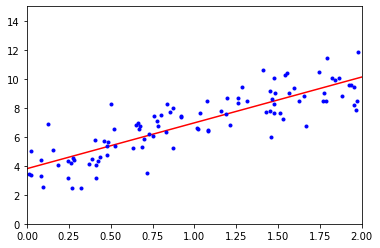

In [13]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## performing linear regression using scikit-learn

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.80426363]), array([[3.15992678]]))

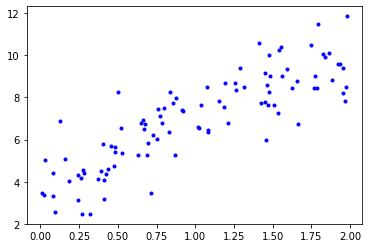

In [15]:
# this is the data
plt.plot(X, y, "b.") 

In [16]:
# The LinearRegression class is based on the scipy.linalg.lstsq() function (the
# name stands for “least squares”), which you could call directly:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.80426363],
       [3.15992678]])

In [18]:
# This function computes θ = X+y, where X+ is the pseudoinverse of X (specifically the
# Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse
# directly:
# >>> np.linalg.pinv(X_b).dot(y)
# array([[4.21509616],
# [2.77011339]])

# read pages-> upto 119

# Computational Complexity

In [19]:
# Warning :
# Both the Normal Equation and the SVD approach get very slow
# when the number of features grows large (e.g., 100,000). On the
# positive side, both are linear with regards to the number of instances
# in the training set (they are O(m)), so they handle large training
# sets efficiently, provided they can fit in memory.

# yk the normal equation's time.. as it computes the inverse of 
# X.T * X which is an (n + 1) X (n + 1) matrix

## Gradient descent

In [20]:
# An important parameter in Gradient Descent is the size of the steps, determined by
# the learning rate hyperparameter.